In [116]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [117]:
# LASSO REGRESSION() algorithm according to paper 
# 1. data ←read (‘data.csv’) 
# 2. (train_features,train_stock_price)← training_function() 
# 3. (test_features,test_stock_price)←testing_function() 
# 4. Model←LASSO_train(train_features ,train_stock_price, lambda) 
# 5. stock_price_predict← LASSO_predict(train_features) 
# 6. MAPE ← mean [abs{(test_stock_price – stock_price_predict)/test_stock_price}] * 100 
# 7. RMSE ← sqrt [mean{(test_stock_price – stock_price_predict)2}] 

In [118]:
# Reading data from CSV

def get_tickers():
    tickers = [] 

    with open('tickers.txt') as tickers_file:
        for line in tickers_file:
            tickers.append(line),

    for i in range(len(tickers)):
        tickers[i] = list(tickers[i].split(" "))
        
    temp_tickers = []
    for i in range(len(tickers)):
        temp_ticker = tickers[i][2].strip()
        counter = 0
        
        while(temp_ticker in temp_tickers):
            counter+=1
            temp_ticker = tickers[i][2] + "-" + str(counter)
        
        tickers[i] = temp_ticker   
        temp_tickers.append(tickers[i])    
        
    # debug
    print(tickers)
         
    return tickers

def read_file(filename, folder="yFinance"):
    
    dir_path = globals()['_dh'][0] #only for jupyter notebook
#     dir_path = os.path.dirname(os.path.realpath(__file__)) #regular python interpreter
    return pd.read_csv(dir_path + '\\' + "csv-files" + '\\' + folder + '\\' + filename)

tickers = get_tickers()

# 1. data ←read (‘data.csv’) 
df = read_file(tickers[0] + '.csv', 'yahoo_finance')
print(df)
print(df.info())
print('Number of trading days: ',df.shape) # In this case, 3692

['GS', 'GS-1']
            Date        Open        High         Low       Close   Adj Close  \
0      04/5/1999   76.000000   77.250000   70.000000   70.375000   52.507099   
1      05/5/1999   69.875000   69.875000   66.250000   69.125000   51.574448   
2      06/5/1999   68.000000   69.375000   67.062500   67.937500   50.688473   
3      07/5/1999   67.937500   74.875000   66.750000   74.125000   55.304993   
4      10/5/1999   73.375000   73.500000   70.250000   70.687500   52.740234   
...          ...         ...         ...         ...         ...         ...   
3687  27/12/2013  176.389999  176.449997  175.570007  176.350006  150.962372   
3688  30/12/2013  176.500000  177.119995  175.259995  175.729996  150.431671   
3689  31/12/2013  176.220001  177.440002  176.220001  177.259995  151.741409   
3690   02/1/2014  176.949997  178.380005  176.360001  176.889999  151.424683   
3691   03/1/2014  176.350006  178.850006  176.220001  178.149994  152.503250   

        Volume  
0     2

In [119]:
# Preprocessing of data

df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df.drop('Date', inplace=True, axis=1)
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-05-04   76.000000   77.250000   70.000000   70.375000   52.507099   
1999-05-05   69.875000   69.875000   66.250000   69.125000   51.574448   
1999-05-06   68.000000   69.375000   67.062500   67.937500   50.688473   
1999-05-07   67.937500   74.875000   66.750000   74.125000   55.304993   
1999-05-10   73.375000   73.500000   70.250000   70.687500   52.740234   
...                ...         ...         ...         ...         ...   
2013-12-27  176.389999  176.449997  175.570007  176.350006  150.962372   
2013-12-30  176.500000  177.119995  175.259995  175.729996  150.431671   
2013-12-31  176.220001  177.440002  176.220001  177.259995  151.741409   
2014-01-02  176.949997  178.380005  176.360001  176.889999  151.424683   
2014-01-03  176.350006  178.850006  176.220001  178.149994  152.503250   

              Volume  
Date          

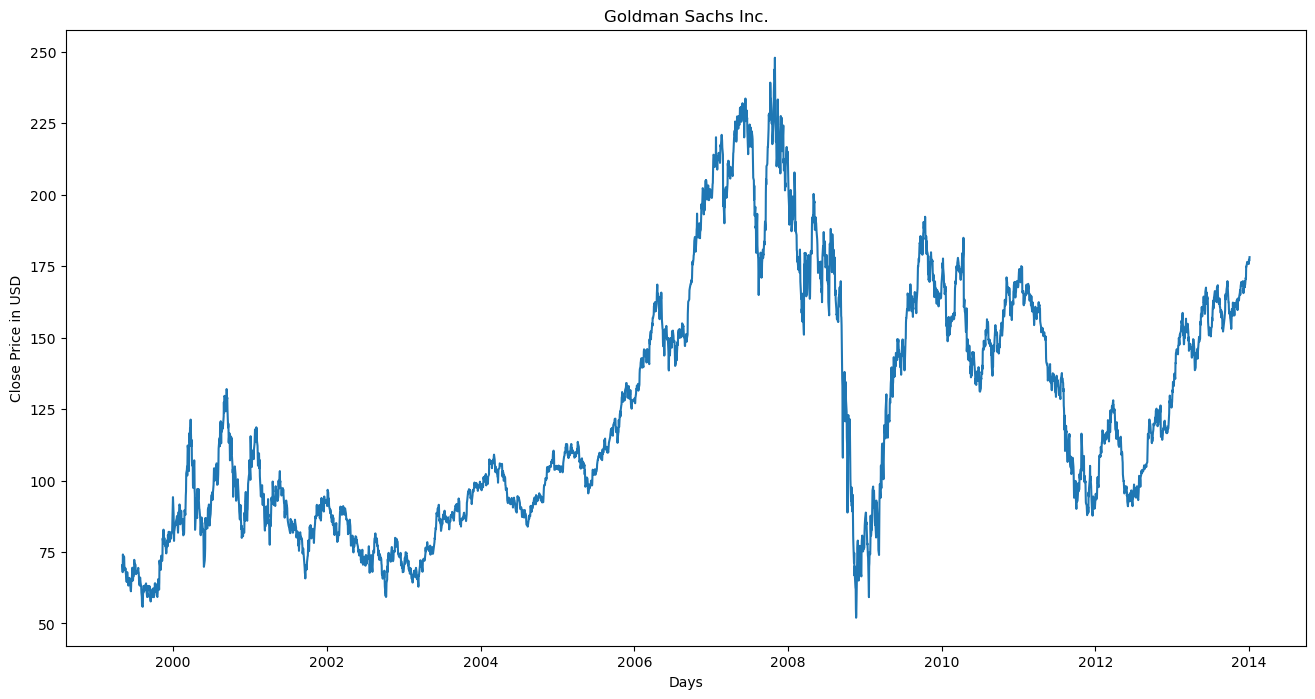

In [120]:
# Visualise the close price
plt.figure(figsize= (16,8))
plt.title('Goldman Sachs Inc.')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

In [152]:
###START TESTING###
import math

# 1. Convert the data into array for easy evaluation
dataset = df[['Close']].values
 
# 2. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
past_stock_price = math.ceil(len(dataset) *.3)
train_data = dataset[:training_data_len  , : ]

# - Can't get it to work with train_test_split for some reason...

# x = dataset[:training_data_len, : ]
# y = dataset[past_stock_price-1:  , : ]

# print(" METHOD 1 - train_test_split ")
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
# print('Train - features: ', x_train.shape,'Labels: ', y_train.shape)
# print('Test - features: ', x_test.shape,'Labels: ', y_test.shape)
 
# 3. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(past_stock_price,len(train_data)):

    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-past_stock_price:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)

print("\n METHOD 2 ")
print('Train - x_train_data1: ', x_train_data1.shape,'y_train_data1: ', y_train_data1.shape)
print('Test - features: ', x_test.shape,'Labels: ', y_test.shape)

print("\n",1809+776,'\t',1477+776)


 METHOD 2 
Train - x_train_data1:  (1477, 1108) y_train_data1:  (1477,)
Test - features:  (776, 1) Labels:  (776, 1)

 2585 	 2253


In [153]:
model = Lasso()
model.fit(x_train_data1, y_train_data1)
# model.fit(x_train, y_train)

Lasso()

In [154]:
# 1. Creating a dataset for testing
test_data = dataset[training_data_len - past_stock_price: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(past_stock_price,len(test_data)):
    x_test.append(test_data[i-past_stock_price:i,0])

# 2. Convert the values into arrays for easier computation
x_test = np.array(x_test)
print(x_test.shape)

# 3. Making predictions on the testing data
predictions = model.predict(x_test)

(1107, 1108)


C:\Users\Nic\AppData\Local\Temp\ipykernel_11180\1758819402.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


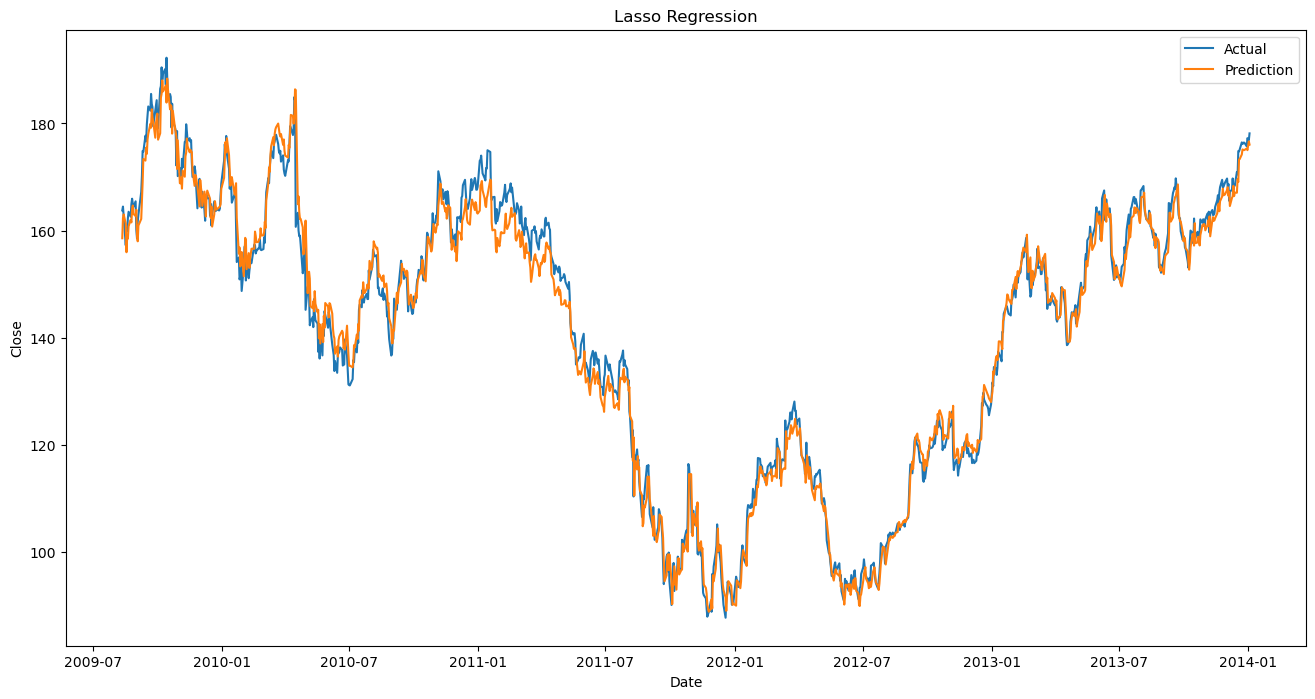

In [156]:
data = df[['Close']]

train = data[:training_data_len]

# print(train.shape)
# difference = math.ceil((len(dataset) *.7) *.3)
# print(difference)
# l = len(dataset) - difference
# valid = data[l:]
# print(valid)

valid = data[training_data_len:]
 
valid['Predictions'] = predictions

plt.figure(figsize= (16,8))
plt.title('Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Actual','Prediction'], loc='upper right')
 
plt.show()

In [125]:
###END TESTING###

In [126]:
# Process of creating a training dataset:

# We need to decide what features to keep - 
# NOTE: these are my own tests
# Features to keep: Close

#-Nic
# Not sure which features to keep exactly 
# Pretty sure we have to keep all of them... maybe besides volume

df = df[['Close']]
print(df.head(5))

# Predict X days into the future
future = 1105 # predict for the test size (30% of 3686 trading days)

# We create a prediction column
df['Predictions'] = df[['Close']].shift(-future)

print(df.head(5))

              Close
Date               
1999-05-04  70.3750
1999-05-05  69.1250
1999-05-06  67.9375
1999-05-07  74.1250
1999-05-10  70.6875
              Close  Predictions
Date                            
1999-05-04  70.3750    85.519997
1999-05-05  69.1250    84.699997
1999-05-06  67.9375    85.000000
1999-05-07  74.1250    83.900002
1999-05-10  70.6875    86.000000


In [127]:
# Creating the feature training set
X = np.array(df.drop(['Predictions'], 1))[:-future]

C:\Users\Nic\AppData\Local\Temp\ipykernel_11180\1279230110.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Predictions'], 1))[:-future]


In [128]:
# Create the target dataset
y = np.array(df['Predictions'])[:-future]

In [129]:
# Splitting the data into training and testing - using the features decided
# trading_days = 3692 (differs from paper = 3686)
# start_date = datetime.date(1999, 5, 4)
# end_date = datetime.date(2014, 1, 3)
# training_percent = 0.7 (70%)
# test_percent = 0.3 (30%)
# Each of the samples composed of daily information 
# including low price, high price, opening price, close price, and trading volume


# 2. (train_features,train_stock_price)← training_function() 
# 3. (test_features,test_stock_price)←testing_function() 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print('Train - features: ', x_train.shape,'Labels: ', y_train.shape)
print('Test - features: ', x_test.shape,'Labels: ', y_test.shape)

print(x_train)
print(y_train)

Train - features:  (1810, 1) Labels:  (1810,)
Test - features:  (777, 1) Labels:  (777,)
[[115.160004]
 [ 69.125   ]
 [ 81.599998]
 ...
 [ 88.75    ]
 [ 96.25    ]
 [127.4375  ]]
[148.720001  84.699997 149.419998 ... 160.070007  88.709999 102.860001]


In [130]:
# Define the model 
# NOTE ! To add later, the ANN and Ridge!

#-Nic
# pretty sure we only need to use a Ridge model. The ANN is not included.

# 4. Model←LASSO_train(train_features ,train_stock_price, lambda) ## not sure what lambda entails (alpha?)
model = Lasso()

# Train the model
lasso_regression = model.fit(x_train, y_train)

In [131]:
# get the last x rows from the feature dataset
x_future = df.drop(['Predictions'],1)[:-future]
x_future = x_future.tail(future)
x_future = np.array(x_future)

C:\Users\Nic\AppData\Local\Temp\ipykernel_11180\1699152188.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Predictions'],1)[:-future]


In [132]:
# 5. stock_price_predict← LASSO_predict(train_features) 

# Use model to make predictions
lasso_prediction = lasso_regression.predict(x_future) #is this not x_test?

C:\Users\Nic\AppData\Local\Temp\ipykernel_11180\3965212147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = lasso_prediction


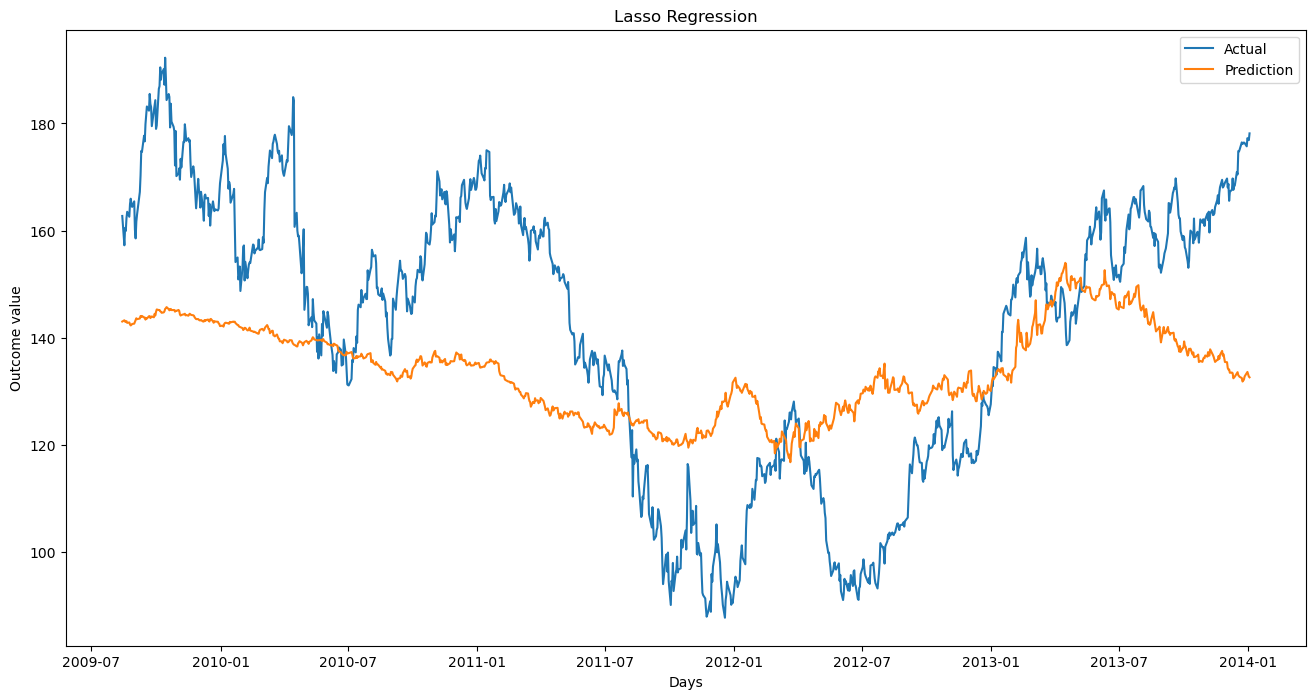

In [133]:
# Visualise the prediction - LR
valid = df[X.shape[0]:]
valid['Predictions'] = lasso_prediction

plt.figure(figsize= (16,8))
plt.title('Lasso Regression')
plt.xlabel('Days')
plt.ylabel('Outcome value')
# plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Actual','Prediction'])
# plt.legend(['Original','Actual','Prediction'])
plt.show()

In [13]:
# Evaluating the model using K-fold CV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [89]:
# Plotting the result

plt.plot(df.index.to_pydatetime(),y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
# 6. MAPE ← mean [abs{(test_stock_price – stock_price_predict)/test_stock_price}] * 100 
def calculate_mape(stock_actual_price, stock_price_predict):
    
    # n = total number of training days
    # p = is the predicted stock price
    # i = day of the stock
    # y = actual stock price
    
    # return (np.mean(np.abs((stock_actual_price[i] - stock_price_predict[i])/stock_actual_price[i] for i in range(len(stock_actual_price))))/n) * 100
    return np.mean(np.abs((stock_actual_price - stock_price_predict)/stock_actual_price)) * 100 

# 7. RMSE ← sqrt [mean{(test_stock_price – stock_price_predict)2}] 
def calculate_rmse(stock_actual_price, stock_price_predict):
    
    # n = total number of training days
    # p = is the predicted stock price
    # i = day of the stock
    # y = actual stock price

    # return np.sqrt(mean((stock_actual_price[i] - stock_price_predict[i])**2 for i in range(len(stock_price_predict)))/n)
    return np.sqrt(mean((stock_actual_price - stock_price_predict)**2))